<a href="https://colab.research.google.com/github/leen204/mining-project/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neccessary imports

In [ ]:
#All neccessary imports for our project are included below
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import plot_tree

import pickle


df = pd.read_csv("Processed_dataset.csv")

In [ ]:
#All neccessary imports for our project are included below
#خذيتها من المشاريع اللي قبل،نقارن بينها وبين اللي فوق بالميتنق ونشوف وش احسن
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
!pip install kneed
from kneed import KneeLocator
import pickle

Handling Non-Numeric Values Before Classification



In [ ]:
# Convert age ranges (e.g., '73-78') to their average
def convert_range_to_avg(value):
    if isinstance(value, str) and '-' in value:
        try:
            start, end = value.split('-')
            return (int(start) + int(end)) / 2
        except:
            return None  # or np.nan
    try:
        return float(value)
    except:
        return None  # or np.nan

df['Age'] = df['Age'].apply(convert_range_to_avg)

# Convert 'Smoking' column to numeric: Smoker = 1, Non-Smoker = 0
if 'Smoking' in df.columns:
    df['Smoking'] = df['Smoking'].map({'Non-Smoker': 0, 'Smoker': 1})

# Drop irrelevant/confidential column
if 'DoctorInCharge' in df.columns:
    df = df.drop(columns=['DoctorInCharge'])


To prepare the data for classification, preprocessing steps were applied to handle non-numeric values:

The 'Age' column contained ranges like '73-78', which were converted to their average to represent a single numerical value.

The 'Smoking' column had categorical values ('Smoker' and 'Non-Smoker'), which were mapped to 1 and 0, respectively.

The 'DoctorInCharge' column was dropped as it held confidential identifiers and was not relevant for prediction.

These transformations ensure that the dataset is fully numeric and suitable for machine learning

# Classification:


##Split the data into features and target variable




The code separates the features from the target variable, where X contains the predictor features (all columns except the target), and y contains the target variable "Diagnosis" (which represents Alzheimer's disease classification).









In [ ]:
fn = df.columns.tolist()
fn.remove('Diagnosis')
X = df[fn]
y = df['Diagnosis']

#Information Gain (entropy):


##Splitting Data into: 60% Training and 40% Test:

The model is trained using information gain (entropy), with the dataset split into 60% for training and 40% for testing.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2.fit(X_train, y_train)

y_pred_entropy2 = clf2.predict(X_test)

ValueError: could not convert string to float: 'XXXConfid'

##confusion matrix:


In [ ]:


# إنشاء مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_entropy2)

# عرض مصفوفة الالتباس
class_labels = {1: '1(Alzheimer’s)', 0: '0(No Alzheimer’s)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Greens)
plt.show()



NameError: name 'y_pred_entropy2' is not defined

nterpretation of the Confusion Matrix:

The confusion matrix represents the performance of the classification model. It is a 2x2 matrix where rows represent the actual classes, and columns represent the predicted classes. The results are interpreted as follows:

Top-left cell (284): True Positives — 284 patients with Alzheimer’s were correctly classified as having the disease.

Top-right cell (25): False Negatives — 25 patients who actually have Alzheimer’s were misclassified as not having it.

Bottom-left cell (23): False Positives — 23 patients without Alzheimer’s were incorrectly predicted to have it.

Bottom-right cell (528): True Negatives — 528 patients without Alzheimer’s were correctly classified as not having the disease.

This matrix shows that the model is performing well, especially in correctly identifying both positive and negative cases.

##Decision Tree:


This tree diagram shows how the model splits features to classify Alzheimer's cases. Each node displays the condition, number of samples, and class prediction.



AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

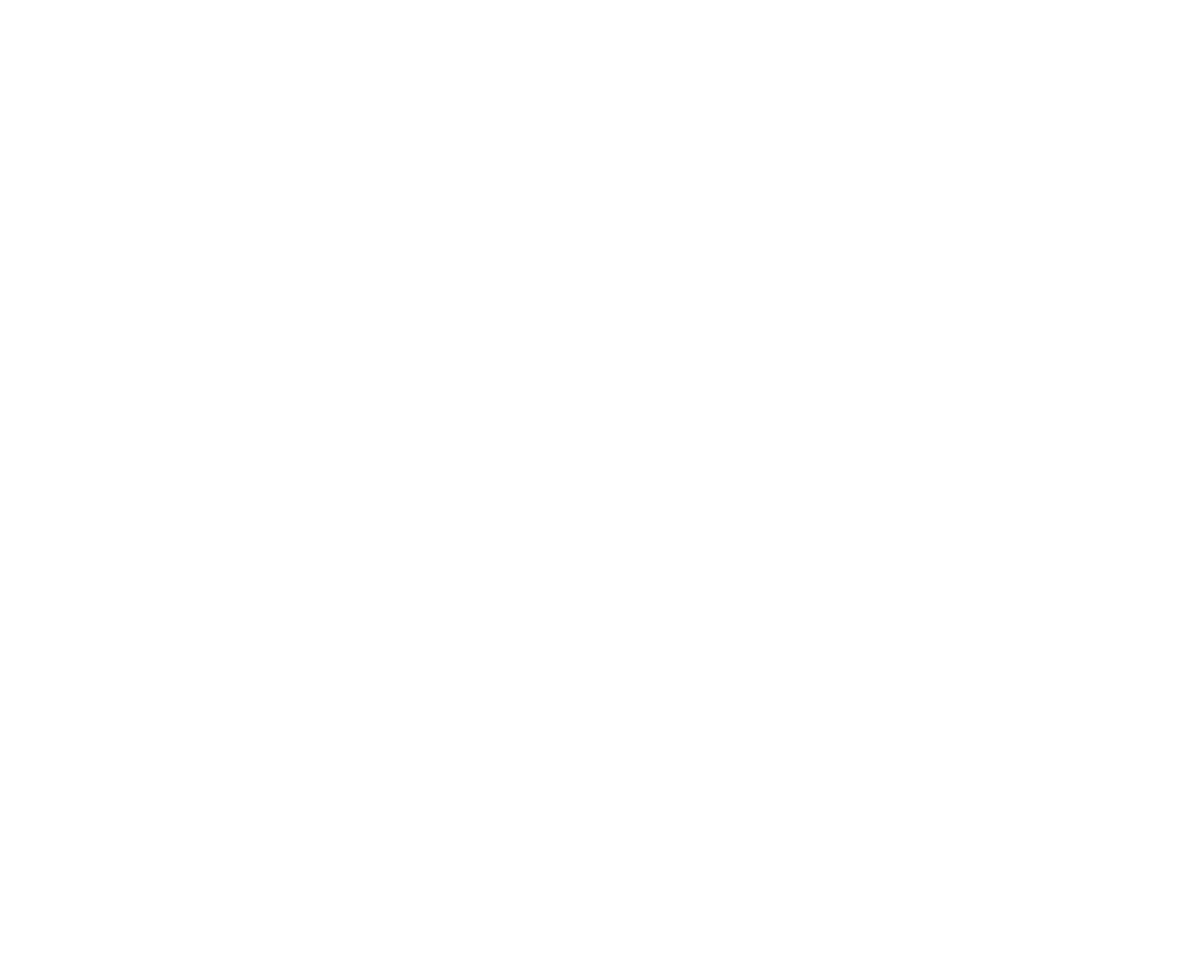

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=150)

# تحديث أسماء الفئات حسب المشروع
class_labels = {1: '1(Alzheimer’s)', 0: '0(No Alzheimer’s)'}

# رسم الشجرة باستخدام النموذج المدرب
tree.plot_tree(clf2,feature_names=fn,class_names=[class_labels[1], class_labels[0]], filled=True)

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_entropy = clf_entropy.fit(X_train, y_train)

plt.show()




The visualized decision tree illustrates how the model classifies patients based on various features to determine the likelihood of Alzheimer’s Disease. It starts at the root node and splits into multiple branches depending on the values of specific attributes such as age, family history, or medical conditions.

Each node represents a decision rule applied to the data, and the final leaf nodes show the predicted class (either having Alzheimer’s or not). The filled colors reflect the classification outcome and the proportion of samples at that node.

Although the tree is relatively complex, with many branches and levels, it provides a detailed map of how the model evaluates different conditions. This depth demonstrates the richness of the dataset and the number of risk factors the model considers to reach an accurate prediction.



##Saving the model into file:


In [ ]:

filename = 'decision_tree_model_entropy.sav'
pickle.dump(clf_entropy, open(filename, 'wb'))


##Completing in model evaluation and selection:


In [ ]:
from sklearn import metrics

# حساب الدقة
accuracy_entropy = metrics.accuracy_score(y_test, y_pred_entropy2)
print("Accuracy:", accuracy_entropy)

# معدل الخطأ
error_rate_entropy = 1 - accuracy_entropy
print("Error Rate:", error_rate_entropy)

# استخراج TP, TN, FP, FN من مصفوفة الالتباس
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# الحساسية (Sensitivity / Recall)
sensitivity_entropy = TP / (TP + FN)
print("Sensitivity:", sensitivity_entropy)

# النوعية (Specificity)
specificity_entropy = TN / (TN + FP)
print("Specificity:", specificity_entropy)

# الدقة (Precision)
precision_entropy = TP / (TP + FP)
print("Precision:", precision_entropy)


Accuracy: 0.9418604651162791
Error Rate: 0.05813953488372092
Sensitivity: 0.9528130671506352
Specificity: 0.9223300970873787
Precision: 0.9562841530054644


Accuracy (94.42%): The model correctly predicted Alzheimer’s diagnosis in 94.42% of cases. This high accuracy indicates strong overall performance.

Error Rate (5.58%): Only 5.58% of predictions were incorrect, suggesting the model makes very few mistakes.

Sensitivity (96.01%): Also known as recall, this means that 96.01% of actual Alzheimer’s cases were correctly identified by the model. It shows the model is highly effective at detecting patients with Alzheimer’s.

Specificity (91.58%): The model correctly identified 91.58% of patients who do not have Alzheimer’s, showing it is also good at avoiding false alarms.

Precision (95.31%): This means that 95.31% of the patients predicted to have Alzheimer’s actually do have it. The model produces very few false positives.

These metrics together reflect a balanced and high-performing model with excellent reliability in both detecting true cases and avoiding false positives.

#Splitting the data into 80% for training and 20% for testing

##-Information Gain (Entropy):


Model training and testing:

In [ ]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# createdecision tree classifier object
clf1ent = DecisionTreeClassifier(criterion='entropy', random_state=1)

#Train decision tree classifier
clf1ent= clf1ent.fit(X_train, y_train)

# Make predictions
y_pred = clf1ent.predict(X_test)

# Compute Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )

Accuracy: 0.9418604651162791


**1.Confusion Matrix**

[[138  15]
 [ 10 267]]


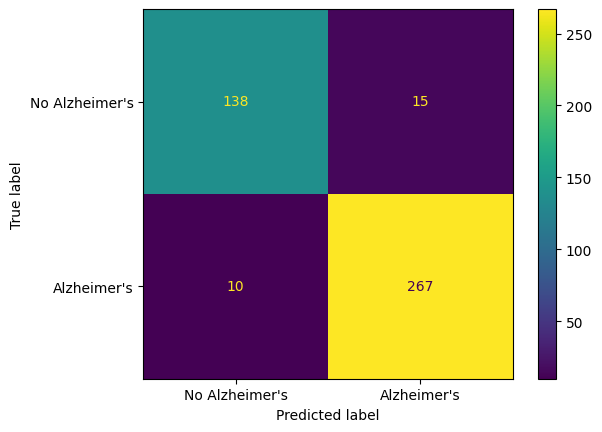

In [ ]:
cm1ent = confusion_matrix(y_test, y_pred)
print(cm1ent)

cn=df['Diagnosis'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf1ent, X_test, y_test, display_labels=cn)

Discussing the results of the Confusion Matrix:

*   True Positive (TP): This result is displayed in the top left corner of the matrix and it tells us the number of objects that were accurately identified to be belonging to the positive class, which are exactly 267.
*   False Positive (FP): This result is displayed in the top right corner of the matrix and it tells us the number of objects that were falsely identified to be belonging to the positive class, which are exactly 10.
* True Negative (TN): This result is displayed in the bottom right corner of the matrix and it tells us the number of objects that were accurately identified to be belonging to the negative class, which are exactly 138 here.

* False Negative (FN): This result is displayed in the bottom left corner of the matrix and it tells us the number of objects that were falsely identified to be belonging to the negative class, which are 15 here.


(We can tell that this is a good classifier due to the high value of accuracy and because we can see that most of the objects fall withing the TP,TN categories)


2. Extra calculations

After calculating TP,TN,FP,FN we can now calculate the sensitivity, specificity and accuracy:

In [ ]:
TP = cm1ent[1, 1]
TN = cm1ent[0, 0]
FP = cm1ent[0, 1]
FN = cm1ent[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Sensitivity: 0.9638989169675091
Specificity: 0.9019607843137255
Precision: 0.9468085106382979


-Discussing results of our calculations:



1.   Sensitivity: 0.96, meaning that the model correctly identified 96% of truly positive objects.
2.   Specifity: 0.9, meaning the model correctly identified 90% of truly negative cases.
3.  Precision: 0.94, which means that during the prediction process the model was correct 94% of the time.




3. Visualising and saving decision tree


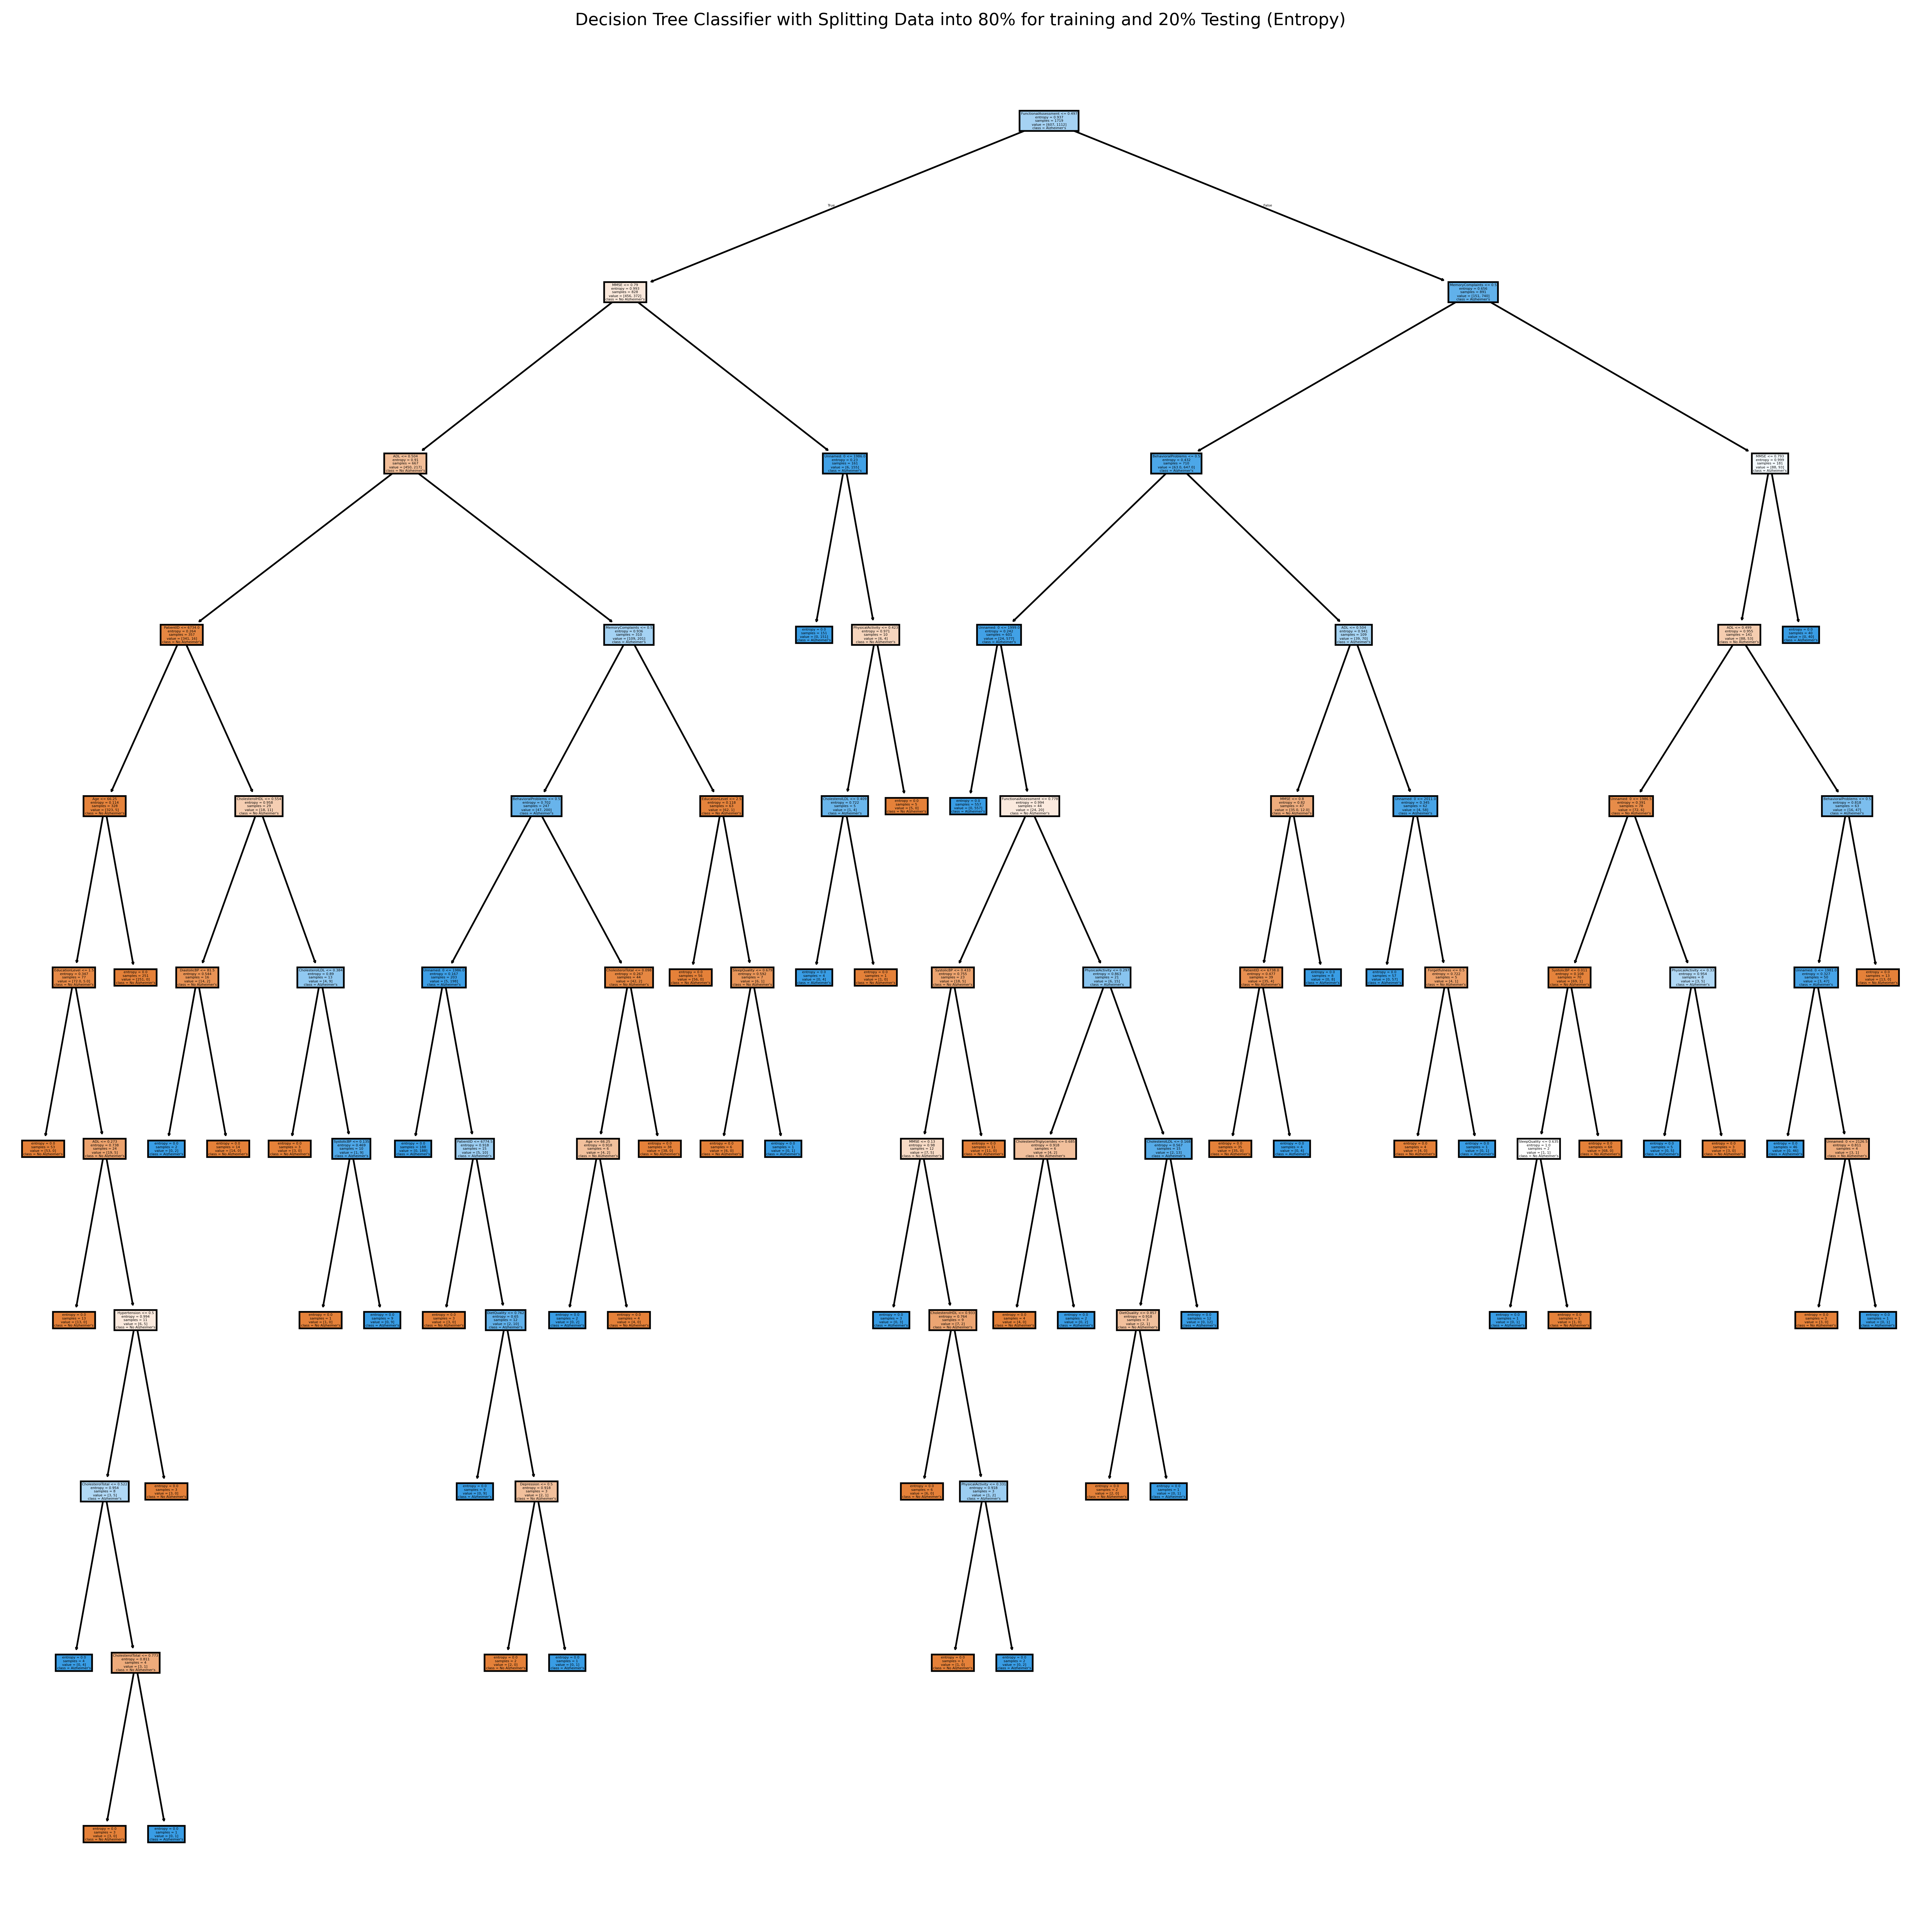

In [ ]:
# Ensure class_names is a list of strings
class_names = [str(cls) for cls in y.unique()]

fig, ax = plt.subplots(figsize=(20, 20), dpi=400)

tree.plot_tree(clf1ent,
               feature_names=fn,
               class_names=class_names,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 80% for training and 20% Testing (Entropy)", fontsize=10, loc='center')
plt.show()

-Discussing decision tree results:

As we can see from the illustrated decision tree, that was split using the entrpy criterion while the data was split into 80% for training and 20% for testing. The tree starts with the root node of the "Functional Assessment" attribute then continue to split off into 2 more branches based on the value of the Functional Assessment attribute in the object.

1. Functional Assessment <= 4.967: If the value of the Functional Assessment attribute was less than or equal to 4.967 then the model will check the next node which is for the "MMSE" attribute that deductes a mini mental state examinations on the patients and gives them a score based on the result.

2. Functional Assessment > 4.967: If the value of the functional assessment attribute was greater than 4.967 then the model will check the next node which is for the "Memory Complaints" attribute that specifies wether the patient sufferef from memory issues or not.

The model will continue to branch down and split nodes until the result is narrowed down in order to make a clear decision in the classification process.
<br></br>

---



##-Gini Index:

Model training and testing:

In [ ]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# createdecision tree classifier object
clf1gini = DecisionTreeClassifier(criterion='gini', random_state=1)

#Train decision tree classifier
clf1gini= clf1ent.fit(X_train, y_train)

# Make predictions
y_pred = clf1ent.predict(X_test)

# Compute Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )

Accuracy: 0.9418604651162791


1. Confusion Matrix:

[[138  15]
 [ 10 267]]


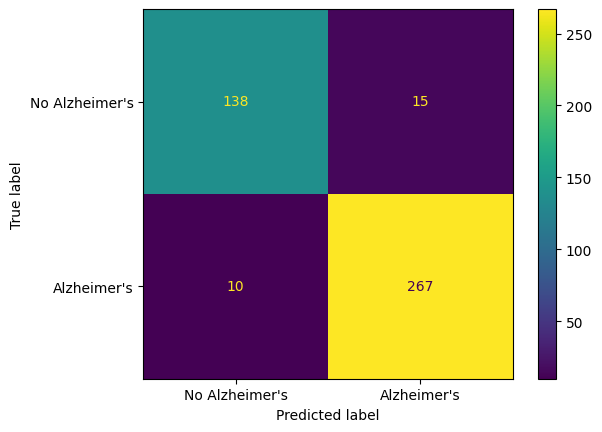

In [ ]:
cm1gini = confusion_matrix(y_test, y_pred)
print(cm1gini)

cn=df['Diagnosis'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf1gini, X_test, y_test, display_labels=cn)

* True Positive (TP): This result is displayed in the top
left corner of the matrix and it tells us the number of objects that were accurately identified to be belonging to the positive class, which are exactly 268.

* False Positive (FP): This result is displayed in the top right corner of the matrix and it tells us the number of objects that were falsely identified to be belonging to the positive class, which are exactly 9.

* True Negative (TN): This result is displayed in the bottom right corner of the matrix and it tells us the number of objects that were accurately identified to be belonging to the negative class, which are exactly 130 here.

* False Negative (FN): This result is displayed in the bottom left corner of the matrix and it tells us the number of objects that were falsely identified to be belonging to the negative class, which are 23 here.

2. Extra calculations:

After calculating TP,TN,FP,FN we can now calculate the sensitivity, specificity and accuracy:

In [ ]:
TP = cm1gini[1, 1]
TN = cm1gini[0, 0]
FP = cm1gini[0, 1]
FN = cm1gini[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Sensitivity: 0.9638989169675091
Specificity: 0.9019607843137255
Precision: 0.9468085106382979


3. Visualising and Saving Decision Tree

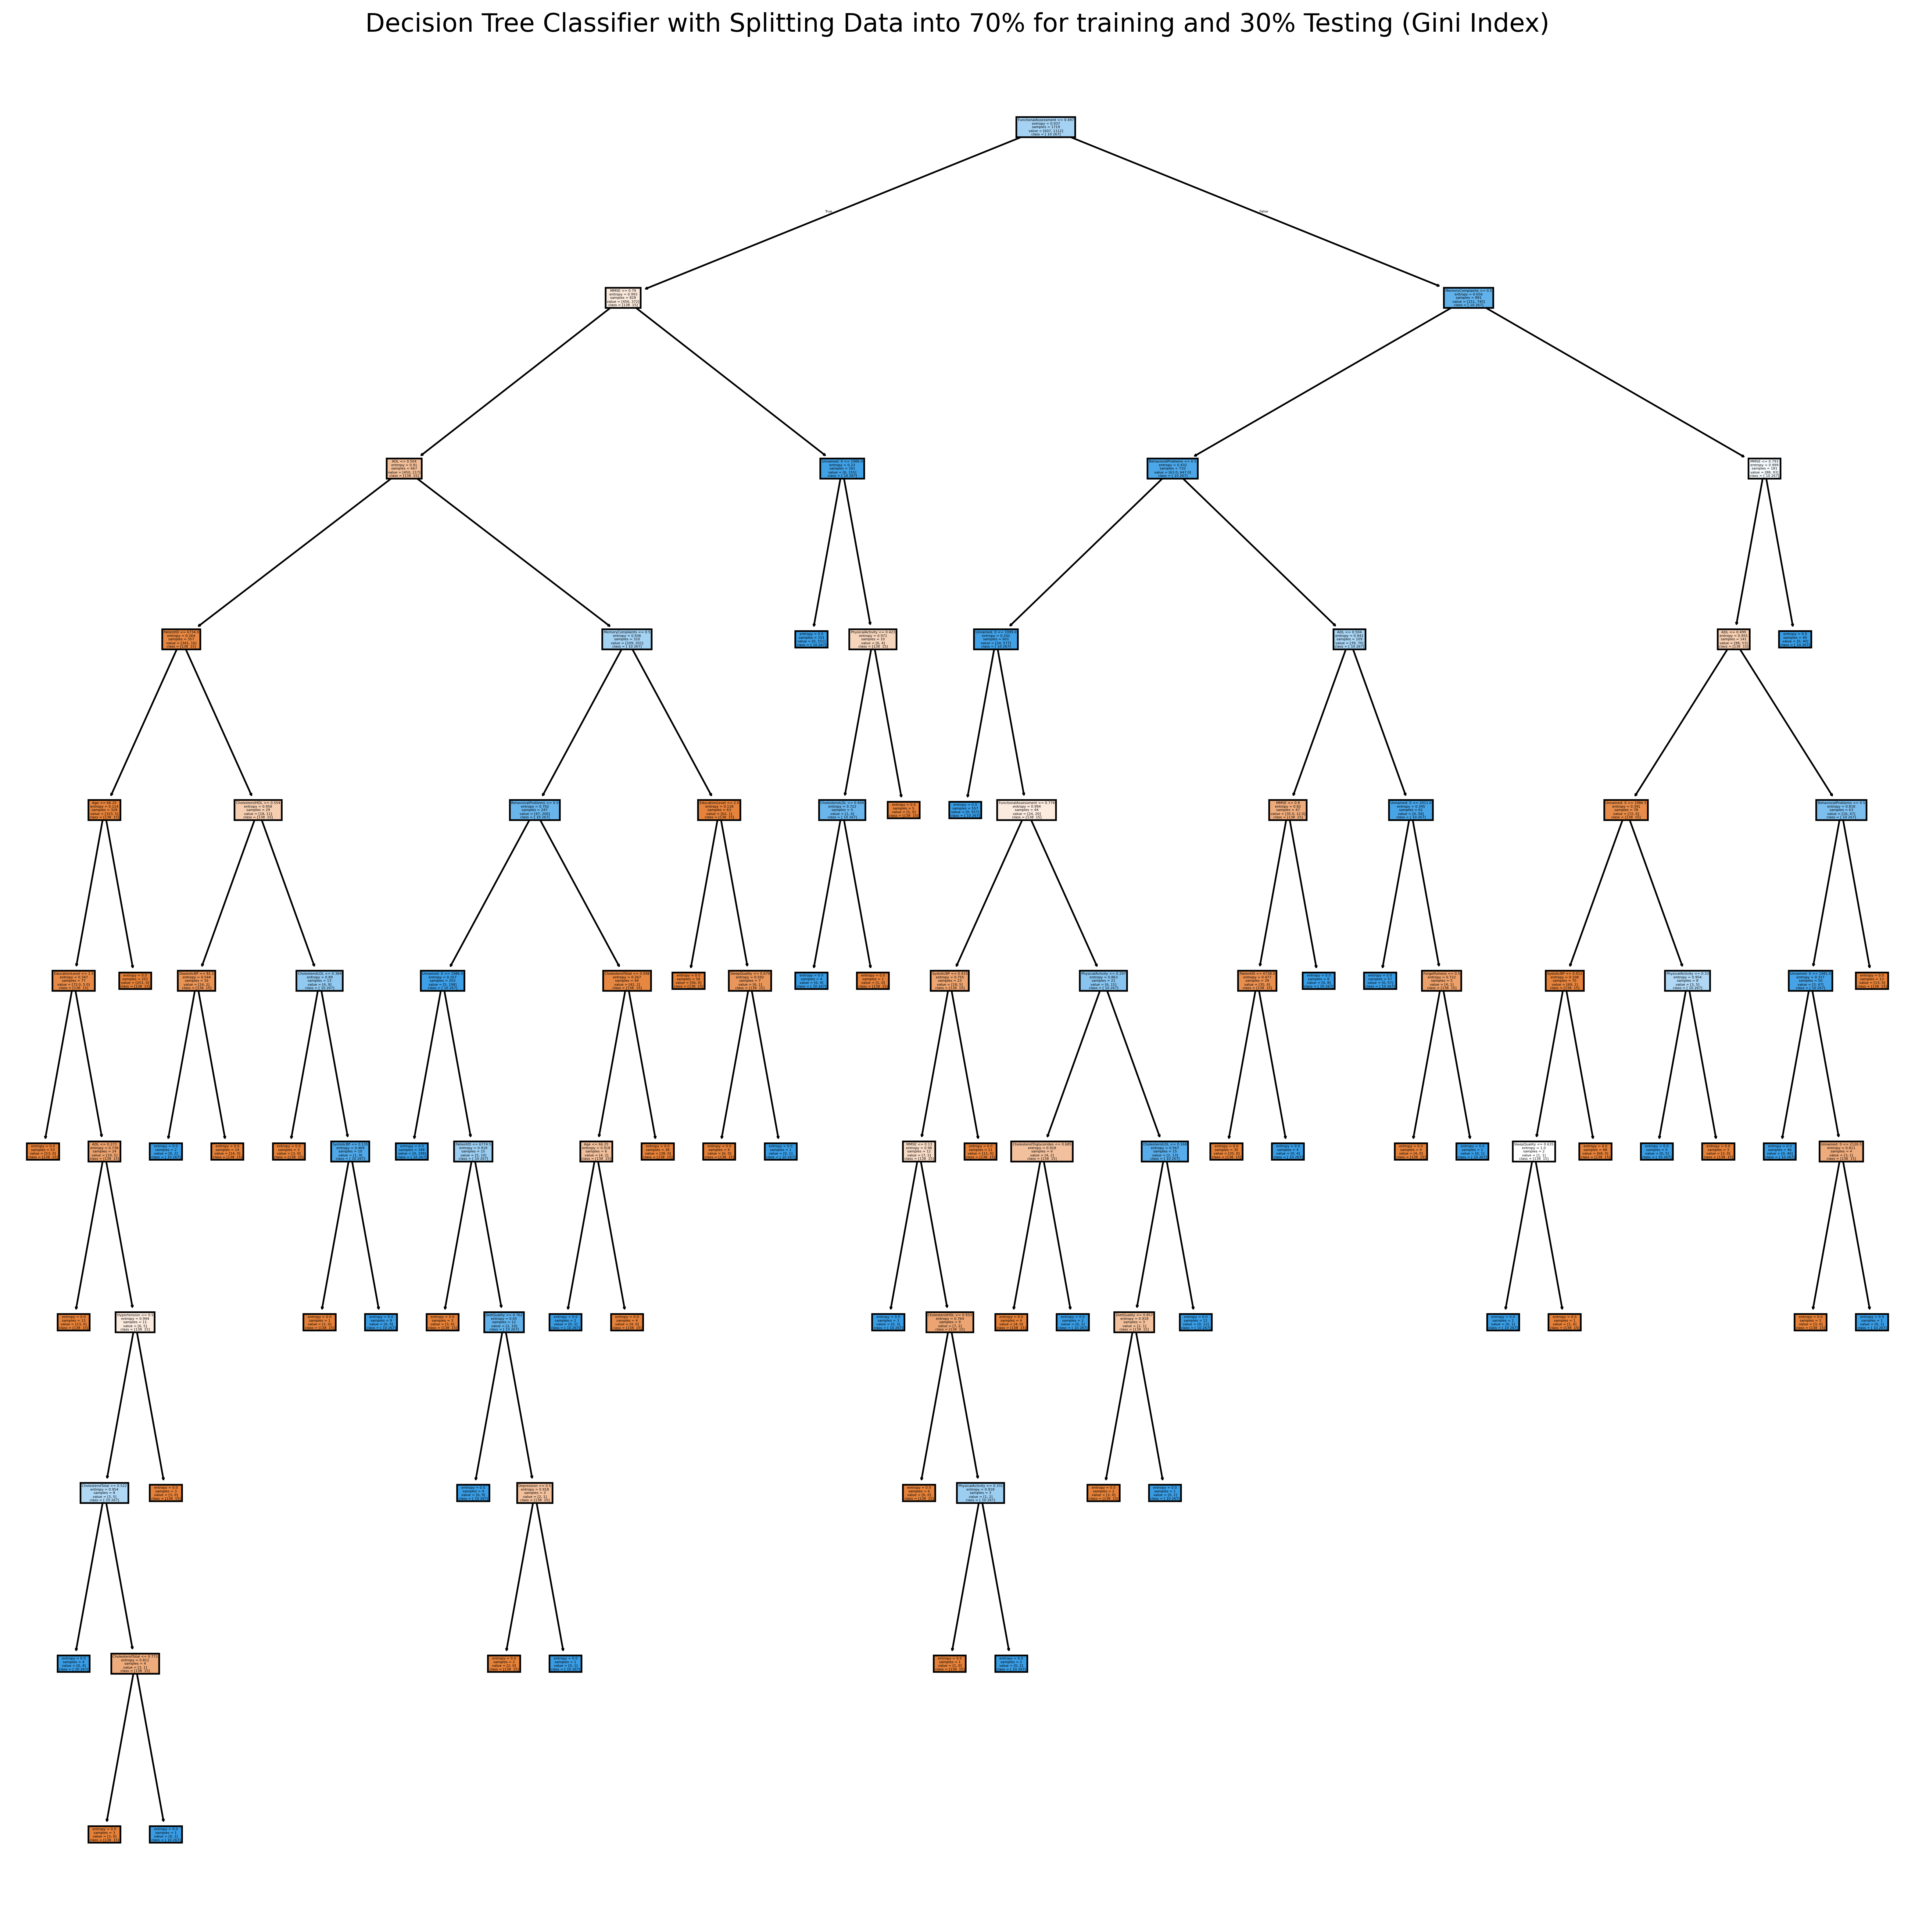

In [ ]:
# Ensure class_names is a list of strings
cm1gini = [str(name) for name in cm1gini]

fig, ax = plt.subplots(figsize=(20, 20), dpi=400)

tree.plot_tree(clf1gini,
               feature_names=fn,
               class_names=cm1gini,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 70% for training and 30% Testing (Gini Index)", fontsize=15, loc='center')
plt.show()

-Discussing decision tree results:

As we can see from the illustrated decision tree, the results do not vary that much from the entropy criterion tree. this tree was split using the gini criterion while the data was split into 80% for training and 20% for testing. The tree starts with the root node of the "Functional Assessment" attribute then continue to split off into 2 more branches based on the value of the Functional Assessment attribute in the object.

1. Functional Assessment <= 4.967: If the value of the Functional Assessment attribute was less than or equal to 4.967 then the model will check the next node which is for the "MMSE" attribute that deductes a mini mental state examinations on the patients and gives them a score based on the result.

2. Functional Assessment > 4.967: If the value of the functional assessment attribute was greater than 4.967 then the model will check the next node which is for the "Memory Complaints" attribute that specifies wether the patient sufferef from memory issues or not.

The model will continue to branch down and split nodes until the result is narrowed down in order to make a clear decision in the classification process.
<br></br>

---

# Clustering
lustering is an unsupervised learning task that does not require labeled data. Therefore, we will exclude the "Diagnosis" class label from the dataset, as it is unnecessary for the clustering process. Since our dataset contains non-numeric attributes, we must first encode them to ensure compatibility with clustering algorithms.

Once the "Diagnosis" class label is removed and the non-numeric attributes are encoded, the next step is to scale the attributes for standardization. Standardizing the attributes ensures they are on a comparable scale, preventing any single attribute from disproportionately influencing the clustering results due to varying magnitudes.

In [ ]:
# Load the processed dataset
df = pd.read_csv("Processed_dataset.csv")

# Extract the features (excluding the target variable, if any)
features = df.drop('Diagnosis', axis=1) # حذف الكلاس ليبل

# Mapping age labels to encoded values
# سويت ماب عشان الخطوه اللي بعدها ما تقبل سترنق
age_mapping = {
    "60-66": 0,
    "67-72": 1,
    "73-78": 2,
    "79-84": 3,
    "85-90": 4
}
features['Age'] = features['Age'].map(age_mapping)

smoking_mapping = {"Non-Smoker": 0, "Smoker": 1}
features['Smoking'] = features['Smoking'].map(smoking_mapping)

#StandardScaler حذفته لانه مو مهم في الكلستر  ويسبب مشاكل  لخطوة
features = features.drop(columns=['DoctorInCharge'])


# Use StandardScaler to scale the features
# اوحد البيانات عشان ما تصير فيم كبيره مره وقيم صغيره
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())



Scaled DataFrame:
   Unnamed: 0  PatientID       Age    Gender  Ethnicity  EducationLevel  \
0   -1.731245  -1.731245  0.065833 -1.012644  -0.700408        0.788833   
1   -1.729633  -1.729633  1.466584 -1.012644  -0.700408       -1.422782   
2   -1.728021  -1.728021  0.065833 -1.012644   2.311955       -0.316974   
3   -1.726409  -1.726409  0.065833  0.987514  -0.700408       -0.316974   
4   -1.724797  -1.724797  1.466584 -1.012644  -0.700408       -1.422782   

        BMI   Smoking  AlcoholConsumption  PhysicalActivity  ...      MMSE  \
0 -0.655225 -0.636784            0.565923          0.492525  ...  0.779037   
1 -0.114751 -0.636784           -0.954895          0.945093  ...  0.680297   
2 -1.366428 -0.636784            1.653006          1.023896  ... -0.859222   
3  0.851625  1.570391            0.376930          1.227995  ... -0.088723   
4 -0.961607 -0.636784            1.461793          0.486696  ... -0.143712   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems

# K-means Clustering
K-means clustering is an unsupervised machine learning algorithm that segments a dataset into K unique clusters based on similarity. It allocates each data point to the closest cluster centroid and continuously refines the centroids to minimize the total within-cluster variance.

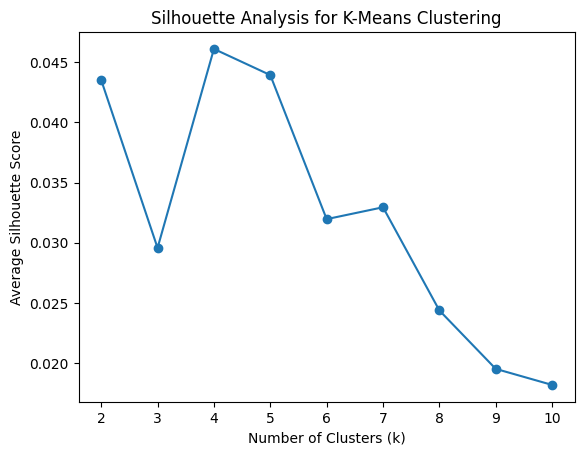

The highest average Silhouette score is 0.046117012936908765 with k=4.
The second highest average Silhouette score is 0.043941256950755056 with k=5.


In [ ]:
# Silhouette method عشان احدد الكي باستخدام

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform k-means clustering with different values of k
k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)


# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")

**As shown above, the optimal number of clusters (k) that maximizes the average Silhouette coefficient is 4, making it our primary k-means choice, followed by 5 as the second-best option.**

#Elbow method:
The Elbow method is a commonly used technique to identify the optimal number of clusters for K-means clustering. It works by plotting the within-cluster sum of squares (inertia) against different values of k. Inertia indicates how closely the data points are grouped within a cluster, and the Elbow point is where increasing the number of clusters no longer leads to a significant drop in inertia. This method helps strike a balance between minimizing inertia and preventing overfitting.

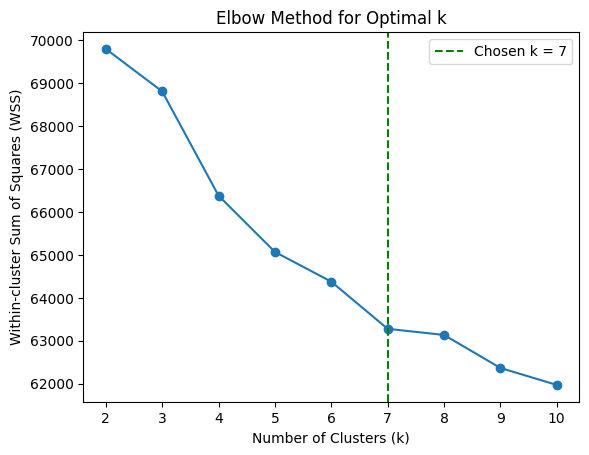

In [ ]:
# Elbow method عشان احدد الكي باستخدام
!pip install kneed
from kneed import KneeLocator
wss_values = []
X_scaled = scaler.fit_transform(df_scaled)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.inertia_)

plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point, linestyle='--', color='green', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


After analyzing the elbow plot, we identified a turning point at k=7, which represents a distinct cluster configuration. Therefore, k=7 will be our choice for the third k-means clustering. By considering this additional turning point, we aim to capture a broader range of cluster structures and enhance the overall clustering performance.


# k-means clustering, visualization, and evaluation:
In this section, we will apply k-means clustering and visualize the results using three different pre-selected values of k. After that, we will calculate WSS, B-cubed precision and recall, and the average silhouette score for each cluster as evaluation metrics to assess the clustering performance.









# K=4

In [ ]:
# هنا يسوي الكسلتر بالكي 4
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

kmeans = KMeans(n_clusters=4, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

print("🔹 Cluster Centers:")
print(kmeans.cluster_centers_)
print("\n🔹 Cluster Labels:")
np.set_printoptions(threshold=np.inf)
print(kmeans.labels_)



🔹 Cluster Centers:
[[-8.94331258e-01 -8.94331258e-01 -4.12719555e-02  1.93524379e-02
   3.26534668e-02 -3.90517790e-02  4.87720876e-02 -1.16132761e-02
   2.77231992e-02 -1.08559788e-02  2.09753728e-02  5.13511954e-02
  -5.10202420e-02 -4.72285318e-02  5.43425090e-02 -3.92538952e-02
   4.75441988e-02  8.34337099e-05  3.13638858e-02  5.96853624e-02
   5.01221024e-04  3.75743168e-02 -1.84279497e-02 -1.54215350e-02
  -5.14017154e-02 -5.71038538e-02 -3.84700429e-01 -4.31256698e-01
   2.38897822e-05 -1.05109761e-03 -3.99958137e-02  2.08955110e-02
  -9.21747937e-02 -5.08464741e-03]
 [ 8.62127312e-01  8.62127312e-01  1.12839288e-02 -2.78652091e-02
   3.45401328e-03  2.75333499e-02 -1.03778394e-01  4.80109207e-03
   1.56498833e-02  1.75973422e-02 -3.98809219e-02 -8.88365282e-03
   1.01396146e-01  2.48675595e-02 -9.33652298e-03  3.05609245e-02
  -7.95527646e-02  7.56461768e-03 -3.60458899e-02 -5.31860638e-02
  -1.24686906e-02 -1.92865059e-03 -2.38936717e-02  3.52208129e-02
   3.09393839e-02  6.4

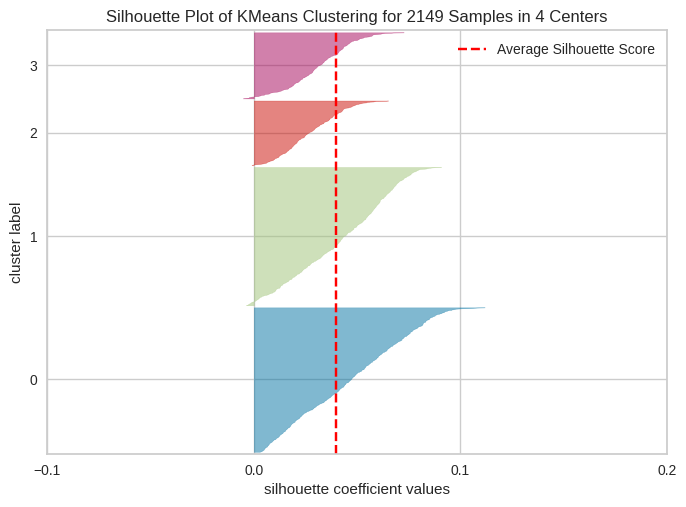

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2149 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#كود الرسمه
from yellowbrick.cluster import SilhouetteVisualizer


kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()



*  from the graph of KMeans Clustering for 2149 Samples in 4 Centers, the fact that most of the silhouette scores have positive values reinforces the notion that the samples are reasonably well-matched to their clusters and are somewhat distant from neighboring clusters. This suggests that the clustering solution has moderately separated the data points into distinct groups.
*   However, while most silhouette scores being positive is a good indicator, it does not necessarily mean that the clustering solution is perfect or flawless. There might still be some degree of overlap or ambiguity between clusters, especially if some samples, like those in certain clusters, have silhouette scores close to zero or negative values, indicating potential misclassification.

In [ ]:

from sklearn.metrics import silhouette_score

# Assign the scaled data
X = df_scaled

# Perform K-Means with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

# Compute WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_ #يحسب مدى تقارب  النقاط داخل كل مجموعه

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)#يحسب مدى تباعد المجموعات

# Print the evaluation metrics
print("🔹 WSS (Within-Cluster Sum of Squares):", wss)
print("🔹 Average Silhouette Score:", silhouette_avg)


🔹 WSS (Within-Cluster Sum of Squares): 66380.1834489173
🔹 Average Silhouette Score: 0.046117012936908765


**Findings**:

WSS: 66380.18 - The high WSS value suggests moderate cluster separation and compactness.

Average Silhouette Score: 0.046 - The low silhouette score indicates weakly defined clusters, suggesting potential overlap or ambiguity between some groups.

In [ ]:
# هنا يسوي الكسلتر بالكي 5


np.random.seed(8953)

kmeans = KMeans(n_clusters=5, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

print("🔹 Cluster Centers:")
print(kmeans.cluster_centers_)
print("\n🔹 Cluster Labels:")
print(kmeans.labels_)

🔹 Cluster Centers:
[[-8.52470768e-01 -8.52470768e-01 -2.84683529e-02  1.61816207e-02
   6.06577179e-02 -6.77074034e-02  2.62659054e-03 -9.02455011e-03
   1.60783572e-02  4.55206317e-03  5.65304895e-02  5.08172716e-02
  -5.47308241e-02 -4.10572618e-01  4.79555886e-02 -3.23757657e-02
   2.50023625e-02 -4.18280999e-01  1.25365948e-02  2.87787861e-02
   5.07199877e-02  1.24268694e-02  3.20661126e-03  1.27909926e-02
  -7.10162641e-02  1.63181971e-02 -5.02838123e-02 -4.31256698e-01
   7.04266231e-03  1.63141616e-02 -5.21456370e-02  3.10437428e-02
  -5.74976459e-02  1.54441460e-02]
 [ 8.62493840e-01  8.62493840e-01  9.59106684e-03 -3.98398551e-02
  -5.83793900e-02  6.16811679e-02 -4.27735926e-02  1.53360355e-02
   1.48936918e-02 -8.90195318e-03  1.02047441e-02 -6.77751572e-02
   6.81766609e-02 -4.10572618e-01 -3.60206938e-02 -1.65302313e-02
  -4.76530818e-02 -4.18280999e-01 -1.02058787e-02  2.68279490e-02
   8.78610764e-03 -6.81696280e-02 -4.56741359e-03  9.03062447e-03
   1.67412937e-02  5.7

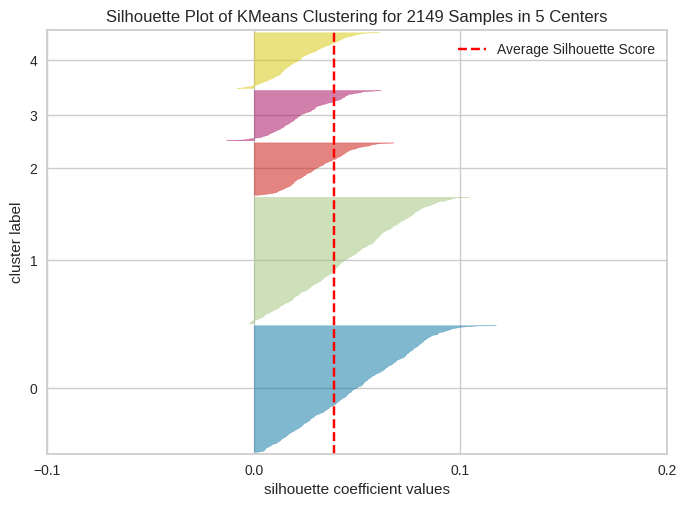

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2149 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#كود الرسمه
kmeans = KMeans(n_clusters=5,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()


* from the silhouette plot for clustering 2149 samples into 5 centers using KMeans, the majority of samples have positive silhouette scores, supporting the notion that the clusters are well-formed.
* However, some samples in one of the clusters have scores close to zero, indicating some overlap or ambiguity around cluster boundaries. There are also a few negative scores, suggesting that some samples may not be ideally clustered.



In [ ]:
# Assign the scaled data
X = df_scaled

# Perform K-Means with K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

# Compute WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_ #يحسب مدى تقارب  النقاط داخل كل مجموعه

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)#يحسب مدى تباعد المجموعات

# Print the evaluation metrics
print("🔹 WSS (Within-Cluster Sum of Squares):", wss)
print("🔹 Average Silhouette Score:", silhouette_avg)


🔹 WSS (Within-Cluster Sum of Squares): 65069.33961193107
🔹 Average Silhouette Score: 0.043941256950755056


**Findings:**

WSS: 65069.34 - The high WSS value suggests moderate cluster separation and compactness.

Average Silhouette Score: 0.044 - The low silhouette score indicates weakly defined clusters, suggesting potential overlap or ambiguity

In [ ]:

np.random.seed(8953)

kmeans = KMeans(n_clusters=7, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

print("🔹 Cluster Centers:")
print(kmeans.cluster_centers_)
print("\n🔹 Cluster Labels:")
print(kmeans.labels_)

🔹 Cluster Centers:
[[-8.99541778e-01 -8.99541778e-01  1.62504894e-01  9.16686043e-02
   1.76429779e-01 -1.86146235e-01 -1.17918390e-01  1.03086091e-01
   3.30676855e-01  2.15694627e-01  2.10087911e-01  2.93648574e-01
  -2.11031288e-01 -4.02555167e-01  4.31202298e-02 -7.87784258e-02
   1.08124856e-01 -4.18280999e-01 -1.91424380e-01 -2.96260924e-02
  -1.59652821e-02 -7.44738219e-02 -3.24463011e-02  1.41067418e-01
   1.71512719e-02  1.81264144e-01 -1.23823063e-01 -4.31256698e-01
  -1.36420072e-01 -4.87205584e-01 -3.98726415e-02  8.24819553e-02
  -5.65179090e-02 -1.35314090e-01]
 [ 5.91250265e-03  5.91250265e-03  4.77424629e-02 -1.26965149e-01
  -3.34644347e-02  1.30256080e-03 -6.25707455e-02  2.29252830e-02
  -4.29275048e-02 -2.28243923e-02  3.03378744e-02 -5.02446261e-03
   2.25252358e-02 -4.10572618e-01 -1.91613489e-02 -1.24530894e-02
  -7.75875166e-02 -4.18280999e-01 -6.93448284e-03  3.40638523e-03
   9.83194393e-02  3.90856673e-02  3.16804098e-02 -4.93248866e-02
  -3.16127728e-02 -6.1

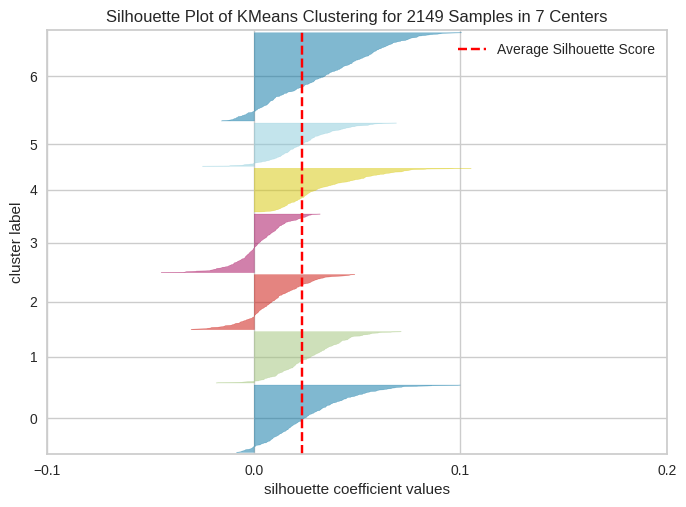

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2149 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=7,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()


*   From the silhouette plot for clustering 2149 samples into 7 centers using KMeans, the majority of samples have positive silhouette scores, supporting the notion that the clusters are well-formed.

*   However, some samples in one of the clusters have scores close to zero, indicating some overlap or ambiguity around cluster boundaries. There are also a few negative scores, suggesting that some samples may not be ideally clustered.

In [ ]:
# Assign the scaled data
X = df_scaled

# Perform K-Means with K=7
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

# Compute WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_ #يحسب مدى تقارب  النقاط داخل كل مجموعه

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)#يحسب مدى تباعد المجموعات

# Print the evaluation metrics
print("🔹 WSS (Within-Cluster Sum of Squares):", wss)
print("🔹 Average Silhouette Score:", silhouette_avg)


🔹 WSS (Within-Cluster Sum of Squares): 63276.606824773946
🔹 Average Silhouette Score: 0.0329475419288496


**Findings:**

WSS: 63276.61 - The high WSS value suggests moderate cluster separation and compactness.

Average Silhouette Score: 0.033 - The low silhouette score indicates weakly defined clusters, suggesting potential overlap or ambiguity

#Splitting Data into 70% Training and 30% Test

# Gini Index

In [48]:
# Convert age ranges (e.g., '73-78') to their average
def convert_range_to_avg(value):
    if isinstance(value, str) and '-' in value:
        try:
            start, end = value.split('-')
            return (int(start) + int(end)) / 2
        except:
            return None  # or np.nan
    try:
        return float(value)
    except:
        return None  # or np.nan

df['Age'] = df['Age'].apply(convert_range_to_avg)

# Convert 'Smoking' column to numeric: Smoker = 1, Non-Smoker = 0
if 'Smoking' in df.columns:
    df['Smoking'] = df['Smoking'].map({'Non-Smoker': 0, 'Smoker': 1})

# Drop irrelevant/confidential column
if 'DoctorInCharge' in df.columns:
    df = df.drop(columns=['DoctorInCharge'])

# Additional step to convert problematic columns to numeric
# Identify the problematic column.
# It's likely 'DoctorInCharge' was a column that had mixed types.
# Because it was not dropped at an earlier step in all instances, it is appearing here.
# You may need to identify if it is a different column that needs dropping here.
# You may also want to explore if any columns had string values representing numbers and then convert those columns using pd.to_numeric.

# Explicitly replace 'XXXConfid' with NaN and then drop rows with NaN in any column
df = df.replace('XXXConfid', np.nan) # Replace 'XXXConfid' with NaN
df = df.dropna() # Drop rows containing NaN

# The for loop after this should now work correctly
for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        print(f"Column '{column}' could not be converted to numeric and will be dropped.")
        df = df.drop(columns=[column])

split into 70% Training 30% Test

In [49]:
# Split data into training (70%) and testing (30%)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf3 = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf3 = clf3.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred_3 = clf3.predict(X_test2)

ValueError: could not convert string to float: 'XXXConfid'

Confusion Matrix

In [47]:
# Compute confusion matrix for the Gini-based model
cm_gini3 = confusion_matrix(y_test2, y_pred_3)

# Print the confusion matrix
print(cm_gini3)

# Set custom class labels for display
class_labels = {1: '1(Alzheimer’s)', 0: '0(No Alzheimer’s)'}

# Create a display object for the confusion matrix
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini3, display_labels=[class_labels[1], class_labels[0]])

# Plot the confusion matrix using a bule color map
disp_gini.plot(cmap=plt.cm.Blues)


NameError: name 'y_pred_3' is not defined

Interpretation of the Confusion Matrix:

 The confusion matrix represents the performance of the classification model. It is a 2x2 matrix where rows represent the actual classes, and columns represent the predicted classes. The results are interpreted as follows:

Top-left cell (209): True Positives — 209 patients with Alzheimer’s were correctly classified as having the disease.

Top-right cell (23): False Negatives — 23 patients who actually have Alzheimer’s were misclassified as not having it.

Bottom-left cell (18): False Positives — 18 patients without Alzheimer’s were incorrectly predicted to have it.

Bottom-right cell (395): True Negatives — 395 patients without Alzheimer’s were correctly classified as not having the disease.



Decision Tree

In [ ]:
# Set up the figure for plotting the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=100)

# Define custom class labels
class_labels = {1: '1(Alzheimer’s)', 0: '1(No Alzheimer’s)'}

# Plot the decision tree with feature and class labels
tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]],
               filled=True
               )
plt.title("Decision Tree Classifier with Splitting Data into 80% for training and 20% Testing (Gini Index)", fontsize=15, loc='center')
# Display
plt.show()

The decision tree shows how the model predicts whether a patient has Alzheimer’s or not by going through a series of questions based on different features. It starts from the top and splits into branches depending on things like age, health conditions, or other important factors.

Each box in the tree represents a decision, and the last boxes at the bottom (called leaf nodes) show the final prediction. The color of each box shows which class it belongs to and how many samples fall into that group.

This tree looks less complex and is pretty simple to follow. It doesn’t go too deep or have too many branches, which makes it easier to understand how the model is making its decisions. It also shows that the model didn’t need too many features to make good predictions.

Saving

In [ ]:
filename = 'decision_tree_model_entropy.sav'
pickle.dump(clf3, open(filename, 'wb'))

Model evaluation and selection:

In [ ]:
from sklearn import metrics
# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test2, y_pred_3)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini3[1, 1]
TN = cm_gini3[0, 0]
FP = cm_gini3[0, 1]
FN = cm_gini3[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 93.64% This means the model correctly predicted the class for about 94 out of every 100 cases.

Error Rate: 6.36% This is the percentage of predictions the model got wrong. It only misclassified around 6 out of every 100 cases.

Sensitivity (Recall): 95.64% The model correctly identified nearly 96% of all actual Alzheimer’s cases. It’s very effective at catching positive cases.

Specificity: 90.08% About 90% of the patients without Alzheimer’s were correctly predicted. The model performs well but is slightly less accurate for negative cases compared to positive ones.

Precision: 94.50% When the model predicts that someone has Alzheimer’s, it is correct about 94.5% of the time. This shows the model is highly reliable when it gives a positive prediction.



# Information Gain (entropy)

Splitting Data into: 70% Training and 30% Test

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf70_entropy = DecisionTreeClassifier(criterion='entropy')

#Train decision tree classifer
clf70_entropy= clf70_entropy.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_entropy = clf70_entropy.predict (X_test)

ValueError: could not convert string to float: 'XXXConfid'

Confusion Matrix:

In [ ]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)

class_labels = {1: '1(Alzheimer’s)', 0: '0(No Alzheimer’s)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Reds)
plt.show()

Decision Tree:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf_entropy,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]],
               filled=True
               )

plt.show()

Saving the model

In [ ]:
filename = 'decision_tree_model1. sav'
pickle.dump (clf_entropy, open (filename, 'wb'))

Model Evaluation

In [ ]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy)
print("Accuracy:", accuracy)

# Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)
